In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела ((вес в кг)/(рост в метрах)**2).

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

8.1 Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [34]:
dupl_columns = list(diabetes.columns)

mask = diabetes.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
diabetes_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Число найденных дубликатов: 10
Результирующее число записей: 768


8.2 Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [102]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
information_diabetes = diabetes_dedupped.drop(low_information_cols, axis=1)
        

Gender: 100.0% одинаковых значений


8.3 Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.


Подсказка (1 из 1): Создайте функцию, которая возвращает np.nan, если её аргумент равен 0, в противном случае — возвращает аргумент. Воспользуйтесь методом apply() и примените созданную функцию для каждого перечисленного столбца.

In [103]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_nan = information_diabetes
diabetes_nan = diabetes_nan[columns].replace({'0':np.nan, 0:np.nan})
information_diabetes[columns] = diabetes_nan[columns]
'''
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
def nan_function(x):
    if x == 0:
        return np.NaN
    else:
        return x
diabetes_nan = diabetes_nan['Insulin'].apply(nan_function)
diabetes_nan
'''

"\ncolumns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']\ndef nan_function(x):\n    if x == 0:\n        return np.NaN\n    else:\n        return x\ndiabetes_nan = diabetes_nan['Insulin'].apply(nan_function)\ndiabetes_nan\n"

In [104]:
display(diabetes_nan['Insulin'].isnull().sum() / diabetes_nan.shape[0] * 100) # не верно, нужно убрать 100
display(information_diabetes.isnull().mean().round(2))
display(diabetes_nan)


48.69791666666667

Pregnancies                 0.00
Glucose                     0.01
BloodPressure               0.05
SkinThickness               0.30
Insulin                     0.49
BMI                         0.01
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,98.0,58.0,33.0,190.0,34.0
1,112.0,75.0,32.0,NaN,35.7
2,108.0,64.0,NaN,NaN,30.8
3,107.0,80.0,NaN,NaN,24.6
4,136.0,90.0,NaN,NaN,29.9
...,...,...,...,...,...
763,139.0,64.0,35.0,140.0,28.6
764,96.0,122.0,NaN,NaN,22.4
765,101.0,86.0,37.0,NaN,45.6
766,141.0,NaN,NaN,NaN,42.4


8.4 Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [105]:
#создаем копию исходной таблицы
drop_data = information_diabetes.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#отображаем результирующую долю пропусков
drop_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


8.5 Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [107]:
m = drop_data.shape[1]
drop_data = drop_data.dropna(thresh=m-2)
drop_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


8.6 В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [113]:
#columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

values = {
    'Glucose': drop_data['Glucose'].median(),
    'BloodPressure': drop_data['BloodPressure'].median(),
    'SkinThickness': drop_data['SkinThickness'].median(),
    'BMI': drop_data['BMI'].median()
}

drop_data = drop_data.fillna(values)
#выводим результирующую долю пропусков
drop_data['SkinThickness'].mean().round(1)

29.1

8.7 Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [114]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(drop_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


8.8 Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [116]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(drop_data, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


8.9 На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

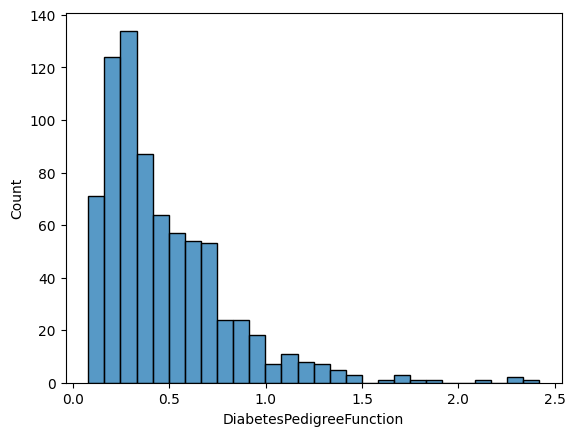

In [128]:
#гистограмма исходного признака
histplot = sns.histplot(drop_data['DiabetesPedigreeFunction'], bins=28)

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [129]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(drop_data, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 29


In [131]:
def outliers_iqr(data, feature):
    x = np.log(data[feature])
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(drop_data, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки в логарифмическом масштабе: {outliers.shape[0]}')

Число выбросов по методу Тьюки в логарифмическом масштабе: 0
